In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model

import keras
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Input, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate, Dropout
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.utils import to_categorical
import seaborn as sns
from numpy import dstack
from matplotlib import pyplot

In [71]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import keras
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [76]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames,prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        
    loaded = dstack(loaded)
    return loaded
    
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial_Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print("trainX shape: ",trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX shape: ", testX.shape)
    print("testy shape: ", testy.shape)
    return trainX, trainy, testX, testy

In [77]:
trainX, trainy, testX, testy = load_dataset()

trainX shape:  (7352, 128, 9)
trainy shape:  (7352, 6)
testX shape:  (2947, 128, 9)
testy shape:  (2947, 6)


In [78]:
def plot_distributions(trainX):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    print(longX.shape)
    pyplot.figure()
    xaxis = None
    for i in range(longX.shape[1]):
        ax = pyplot.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
        ax.set_xlim(-1, 1)
        if i == 0:
            xaxis = ax
        pyplot.hist(longX[:, i], bins=100)
    pyplot.show()

(470528, 9)


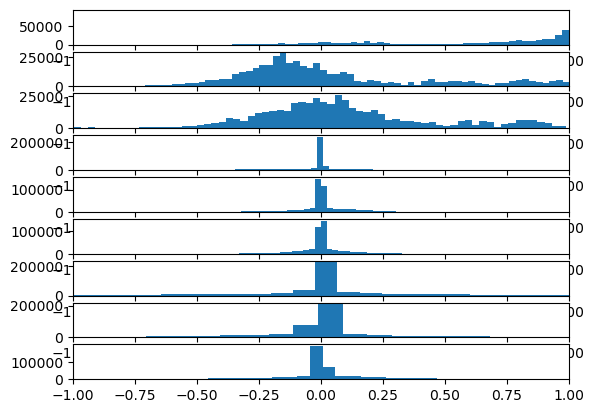

In [79]:
plot_distributions(trainX)

In [80]:
batch_size = 64
validation_split = 0.2

In [81]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-09-22 11:44:13.637378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
train_epochs = 10
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_split=validation_split, shuffle=True)

Epoch 1/10
92/92 [==============================] - 8s 72ms/step - loss: 1.2248 - accuracy: 0.4785 - val_loss: 1.0039 - val_accuracy: 0.6261
Epoch 2/10
92/92 [==============================] - 7s 71ms/step - loss: 0.7346 - accuracy: 0.6914 - val_loss: 0.7058 - val_accuracy: 0.7301
Epoch 3/10
92/92 [==============================] - 6s 69ms/step - loss: 0.6307 - accuracy: 0.7385 - val_loss: 0.7231 - val_accuracy: 0.7383
Epoch 4/10
92/92 [==============================] - 6s 69ms/step - loss: 0.4833 - accuracy: 0.8050 - val_loss: 0.7498 - val_accuracy: 0.7661
Epoch 5/10
92/92 [==============================] - 6s 69ms/step - loss: 0.3574 - accuracy: 0.8800 - val_loss: 0.4942 - val_accuracy: 0.8715
Epoch 6/10
92/92 [==============================] - 6s 69ms/step - loss: 0.2389 - accuracy: 0.9175 - val_loss: 0.4761 - val_accuracy: 0.8912
Epoch 7/10
92/92 [==============================] - 6s 68ms/step - loss: 0.1971 - accuracy: 0.9320 - val_loss: 0.4310 - val_accuracy: 0.8987
Epoch 8/10
92

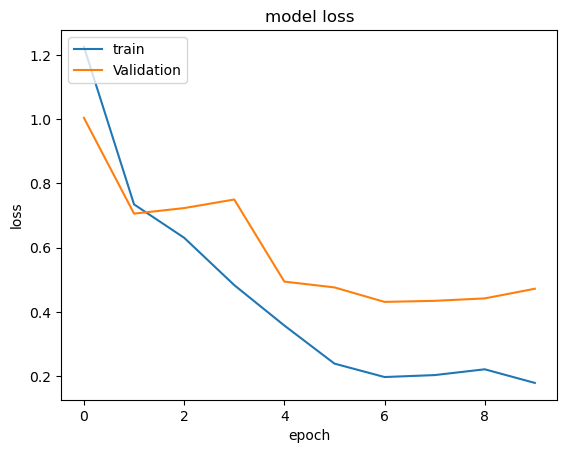

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [85]:
# evaluate model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the LSTM model", test_accuracy)
# Get the predictions for the test set
predictions = model.predict(testX)

Accuracy of the LSTM model 0.8832710981369019
93/93 [==============================] - 2s 18ms/step


In [86]:
predictions

array([[2.2405676e-04, 6.2736748e-05, 1.6140428e-05, 6.8024704e-03,
        9.9288905e-01, 5.5091755e-06],
       [2.1129093e-04, 5.4696324e-05, 1.3786231e-05, 6.0578226e-03,
        9.9365813e-01, 4.2866400e-06],
       [2.0566904e-04, 5.3617292e-05, 1.2830163e-05, 5.4467903e-03,
        9.9427742e-01, 3.6946071e-06],
       ...,
       [5.6948229e-03, 9.9163365e-01, 2.6188802e-03, 5.0406343e-06,
        4.5985777e-05, 1.4821572e-06],
       [8.5791443e-03, 9.9027318e-01, 1.0554440e-03, 1.0662421e-05,
        7.8357298e-05, 3.2465252e-06],
       [3.8412460e-03, 9.9564338e-01, 4.4604382e-04, 9.8085766e-06,
        5.5467233e-05, 4.0046780e-06]], dtype=float32)

In [87]:
def display_results(testy,predictions,classNames):
    y_test=np.argmax(testy, axis=1)
    y_scores=np.argmax(predictions, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y] #/np.sum(cm[x,:])

    plt.figure(figsize=(10,8))
    df = sns.heatmap(con, annot=True, fmt='g', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**** Confusion Matrix ****
[[455   5  35   0   1   0]
 [ 15 441  15   0   0   0]
 [  4   0 416   0   0   0]
 [  0   1   0 369 121   0]
 [  2   0   0  66 464   0]
 [  0  38   5  36   0 458]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       0.96      0.92      0.94       496
           2       0.91      0.94      0.92       471
           3       0.88      0.99      0.93       420
           4       0.78      0.75      0.77       491
           5       0.79      0.87      0.83       532
           6       1.00      0.85      0.92       537

    accuracy                           0.88      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.88      0.88      2947



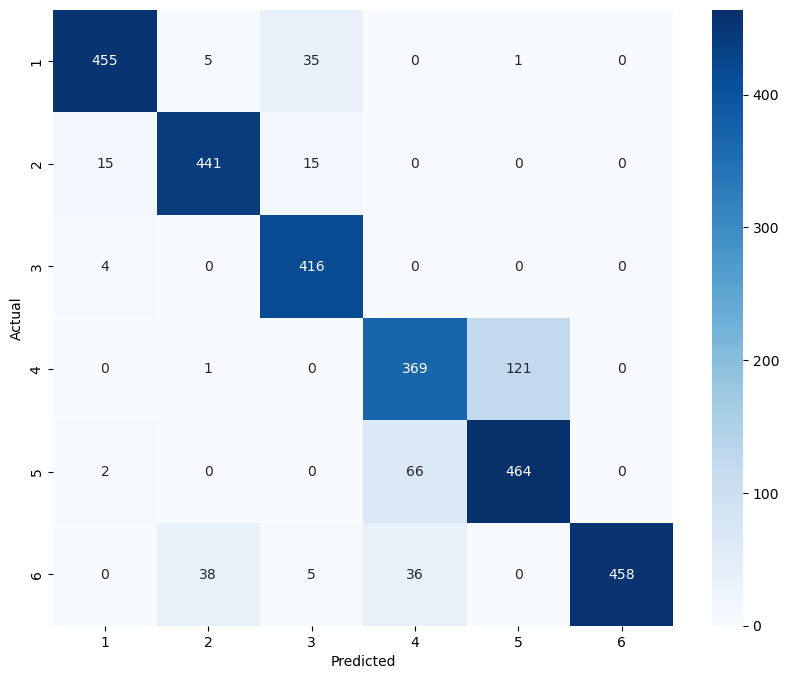

In [88]:
classNames=["1","2","3","4","5","6"]
display_results(testy,predictions,classNames)

##CNN

In [103]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
train_epochs = 20
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_split=validation_split, shuffle=True)

Epoch 1/20
92/92 [==============================] - 2s 15ms/step - loss: 0.4478 - accuracy: 0.8255 - val_loss: 0.3744 - val_accuracy: 0.8797
Epoch 2/20
92/92 [==============================] - 1s 14ms/step - loss: 0.1534 - accuracy: 0.9386 - val_loss: 0.3793 - val_accuracy: 0.9048
Epoch 3/20
92/92 [==============================] - 1s 14ms/step - loss: 0.1056 - accuracy: 0.9565 - val_loss: 0.4167 - val_accuracy: 0.9137
Epoch 4/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0968 - accuracy: 0.9570 - val_loss: 0.4823 - val_accuracy: 0.9103
Epoch 5/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0873 - accuracy: 0.9583 - val_loss: 0.5094 - val_accuracy: 0.9096
Epoch 6/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0991 - accuracy: 0.9546 - val_loss: 0.5095 - val_accuracy: 0.9123
Epoch 7/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0918 - accuracy: 0.9621 - val_loss: 0.5582 - val_accuracy: 0.9069
Epoch 8/20
92

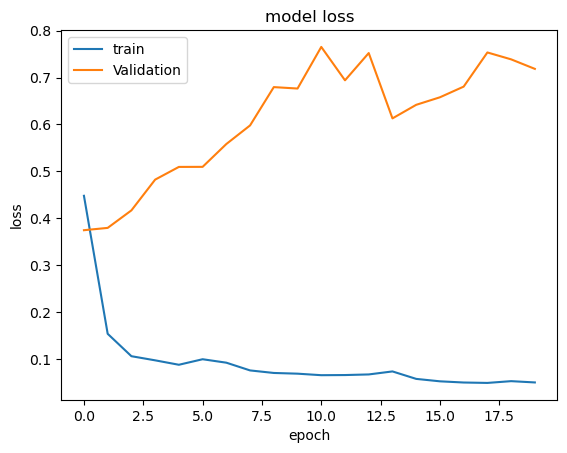

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [107]:
# evaluate model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model.predict(testX)

Accuracy of the CNN model 0.907024085521698
93/93 [==============================] - 0s 3ms/step


**** Confusion Matrix ****
[[458   1  37   0   0   0]
 [  3 441  26   0   0   1]
 [  1   0 419   0   0   0]
 [  0  20   0 430  40   1]
 [  3   3   0  95 431   0]
 [  0  43   0   0   0 494]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       0.98      0.92      0.95       496
           2       0.87      0.94      0.90       471
           3       0.87      1.00      0.93       420
           4       0.82      0.88      0.85       491
           5       0.92      0.81      0.86       532
           6       1.00      0.92      0.96       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



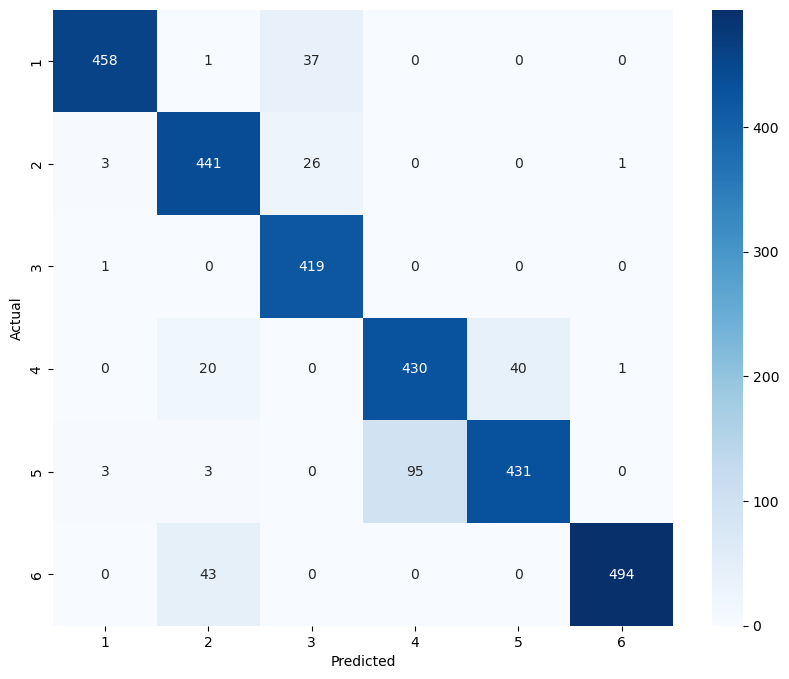

In [108]:
display_results(testy,predictions,classNames)